In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_hous=pd.read_csv('housing.csv')

In [3]:
df_hous.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df_hous.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
df_hous.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df_hous.shape

(20640, 10)

In [7]:
#visualize data to understand realation between them
corr=df_hous.corr()

In [8]:
df_hous.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


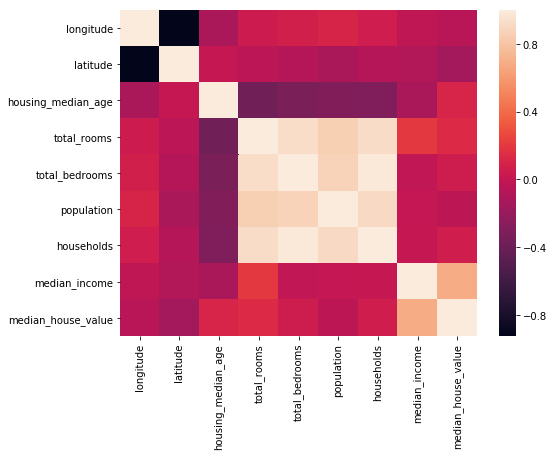

In [9]:
plt.figure(figsize=(8,6))
pltheatmap=sns.heatmap(corr)

In [10]:
#slice dataset into train and test data
X=df_hous.iloc[:,:-1].values
y=df_hous.iloc[:,9].values


In [11]:
X

array([[-122.23, 37.88, 41, ..., 126, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21, ..., 1138, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52, ..., 177, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17, ..., 433, 1.7, 'INLAND'],
       [-121.32, 39.43, 18, ..., 349, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16, ..., 530, 2.3886, 'INLAND']], dtype=object)

In [12]:
y

array([452600, 358500, 352100, ...,  92300,  84700,  89400], dtype=int64)

In [13]:
#encoding
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
X[:,8]=lbl.fit_transform(X[:,8])

In [14]:
X[:,8]

array([3, 3, 3, ..., 1, 1, 1], dtype=object)

### handle missing values

In [16]:
df_hous.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [17]:
df_X=pd.DataFrame(X)

In [18]:
df_X.isnull().sum()

0      0
1      0
2      0
3      0
4    207
5      0
6      0
7      0
8      0
dtype: int64

In [28]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='mean',axis=0)
X[:,4:5]=imp.fit_transform(X[:,4:5])

In [29]:
df_X=pd.DataFrame(X)
df_X.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

## Principal Component Analysis - scaling

In [31]:
from sklearn.preprocessing import StandardScaler
stdsclr=StandardScaler()
X_std=stdsclr.fit_transform(X)

C:\Users\DEVIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DEVIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [35]:
#pca
from sklearn.decomposition.pca import PCA
PCA=PCA(n_components=6)
principle_components=PCA.fit_transform(X_std)

In [36]:
principle_components

array([[-2.15719994,  1.70225453,  1.8547863 ,  1.70382331,  0.70467378,
         0.14044674],
       [ 2.87263151,  2.3047156 ,  1.9782144 ,  1.45640433,  0.22588098,
        -0.38227627],
       [-2.03519184,  1.79186986,  0.9709968 ,  1.89443788,  1.26251199,
         0.04699636],
       ...,
       [-0.45515873,  1.6384034 , -0.31193923, -1.51947927, -0.81951544,
        -0.24827694],
       [-0.86707319,  1.61941222, -0.20800024, -1.4886554 , -0.79020992,
        -0.28420985],
       [ 0.13316801,  1.6848017 , -0.05224996, -1.36842899, -0.68749535,
        -0.17045861]])

In [37]:
df_X=pd.DataFrame(X)

In [38]:
print(df_X.columns)

RangeIndex(start=0, stop=9, step=1)


In [39]:
df_hous.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [40]:
# Dump components relations with features: This gives us the picture of how features are related to components
print(pd.DataFrame(PCA.components_,columns=df_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6']))

             0         1         2         3         4         5         6  \
PC-1  0.081446 -0.077765 -0.219732  0.482987  0.488518  0.471762  0.490642   
PC-2 -0.670071  0.655264  0.033190  0.084062  0.072089  0.031852  0.074866   
PC-3 -0.089342  0.065996 -0.428611  0.085889 -0.120442 -0.114825 -0.113064   
PC-4  0.110276 -0.277884  0.419471  0.082480  0.029807  0.002983  0.041821   
PC-5 -0.140912  0.061118  0.762079  0.085413  0.046079  0.096782  0.078822   
PC-6 -0.113470 -0.073868 -0.042409 -0.313566 -0.391694  0.841691 -0.123976   

             7         8  
PC-1  0.045539 -0.041798  
PC-2 -0.032873  0.317125  
PC-3  0.856744 -0.148639  
PC-4  0.377072  0.763565  
PC-5  0.290296 -0.535139  
PC-6  0.052332  0.039623  


In [41]:
principle_components.shape

(20640, 6)

# models

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(principle_components,y,
                                              test_size=0.1,random_state=5)

### Linear regression

In [44]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
linreg.predict(X_test)

array([146746.67398932, 175984.74810187, 206190.92578413, ...,
       147200.35052537,  68533.87478496, 232359.9353935 ])

In [47]:
print(linreg.score(X_train,y_train))
print(linreg.score(X_test,y_test))

0.5395416718160424
0.5518783995089402


In [48]:
lin_prediction=linreg.predict(X_test)

In [49]:
#rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,lin_prediction))

79724.61670754895

### Decision Tree ML model

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(max_depth=9,min_samples_split=5)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
print(dt_reg.score(X_train,y_train))
print(dt_reg.score(X_test,y_test))

0.7563980828625313
0.6705139983171857


In [53]:
dt_pred=dt_reg.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,dt_pred))

68361.72058085914

In [55]:
### random forest model
#Declare hyper parameters to tune RF model
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1],
                  'randomforestregressor__min_samples_split': [2, 5],
                  'randomforestregressor__min_samples_leaf': [10, 5]}

In [60]:
#Make a Random forest pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(RandomForestRegressor(n_estimators=50))

In [61]:
#Cross Validation to find best parameters
from sklearn.grid_search import GridSearchCV
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1], 'randomforestregressor__min_samples_split': [2, 5], 'randomforestregressor__min_samples_leaf': [10, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [62]:
clf.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 5,
 'randomforestregressor__min_samples_split': 5}

In [63]:
clf.best_score_

0.7422114019798965

In [64]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [65]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8789781065598394
0.7536384421865041


In [66]:
rf_pred=clf.predict(X_test)

In [67]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,rf_pred))

59112.72383975569

## model trainig only with median_income column

In [69]:
df_X.head()

,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41,880,129,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190,496,177,7.2574,3
3,-122.25,37.85,52,1274,235,558,219,5.6431,3
4,-122.25,37.85,52,1627,280,565,259,3.8462,3


In [71]:
X=np.delete(X,[0,1,2,3,4,5,6,8],axis=1)

In [72]:
X

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7],
       [1.8672],
       [2.3886]], dtype=object)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=1/4,random_state=5)

In [75]:
X_train.shape

(15480, 1)

In [76]:

#Feature Scaling
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
X_train_std = stdsclr.fit_transform(X_train)

C:\Users\DEVIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DEVIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [77]:
#Feature Scaling
X_test_std = stdsclr.fit_transform(X_test)

C:\Users\DEVIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DEVIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
linReg1 = LinearRegression()
linReg1.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
print(linReg1.score(X_train_std,y_train))
print(linReg1.score(X_test_std,y_test))

0.4699264495557366
0.48297435467573047


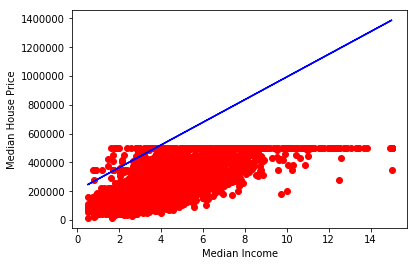

In [82]:
# Visualising the Regression results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, linReg1.predict(X_test), color = 'blue')
#plt.title('Median House Price Prediction')
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.show()